## Exploring Interpolation functions

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

In [87]:
# Tent function definition for GMPM (Gimp)
def sn(xp, xn, L):
    d = (xp - xn)

    if d <= -L:
        Sn = 0.0
    elif d > -L and d <= 0:
        Sn = 1.0 + d / L
    elif d > 0 and d <= L:
        Sn = 1.0 - d / L
    else:
        Sn = 0.0

    return Sn

In [100]:
#Snp weighting function based on previous Sn defintion

def snp(xp, xn, lp, L):
    #L is grid delta
    #lp
    d = (xp - xn)
    
    Snp = 0

    if d <= -L -lp:
        Snp = 0.0
    elif d <= -L + lp:
        Snp = ((L + lp + d) ** 2.0) / (4.0 * L * lp)
    elif d <= -lp:
        Snp = 1.0 + d/L
    elif d<= lp:
        Snp = 1.0-(d**2.0+lp**2.0)/(2.0*L*lp)
    elif d<= L-lp:
        Snp = 1.0 - d/L
    elif d<= L + lp:
        Snp = ((L + lp - d) ** 2.0) / (4.0 * L * lp)
    elif d > L + lp :
        Snp = 0.0

    return Snp

In [115]:
#Gnp (gradient) weighting function based on previous Sn defintion
def gnp(xp, xn, lp, L):
    d = (xp - xn)

    if d<=-L-lp: Gnp = 0.0
    elif d>L+lp: Gnp = 0.0
    elif d<=-L+lp: Gnp = (L+d+lp)/(2.0*L*lp)
    elif d<=-lp: Gnp = 1.0/L
    elif d<=lp: Gnp = -d/(L*lp)
    elif d<=L-lp: Gnp = -1.0/L
    else:        Gnp = (-L+d-lp)/(2.0*L*lp)
    return Gnp

Text(0.5, 1.0, 'Sn plot (L: 1.0, mat_point at: 2.0)')

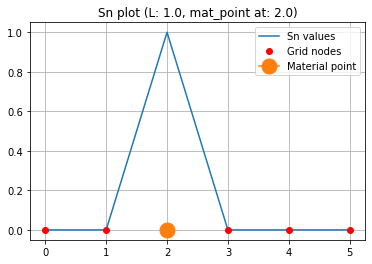

In [158]:
fig, ax = plt.subplots()

xp = 2.0
L = 1.0
xn_arr = np.linspace(0, 5 * L, 6)

sn_arr = [sn(xp, xn, L) for xn in xn_arr]
ax.plot(xn_arr, sn_arr, label= 'Sn values')
ax.plot(xn_arr, [0] * xn_arr.size, 'o', label= 'Grid nodes', color= 'red')
ax.plot([xp], [0], marker='o', markerSize=15, label='Material point')

ax.set_xticks(xn_arr)


ax.legend()
ax.grid(True)
ax.set_title('Sn plot (L: %s, mat_point at: %s)'%(L, xp))



Text(0.5, 1.0, 'Sn plot (L: 1.0, mat_point at: 2.8)')

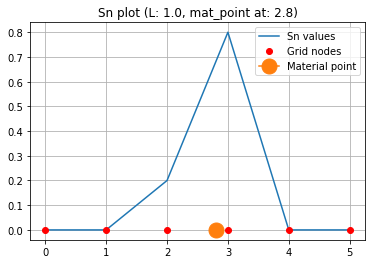

In [152]:
fig, ax = plt.subplots()

xp = 2.8
L = 1.0
xn_arr = np.linspace(0, 5 * L, 6)

sn_arr = [sn(xp, xn, L) for xn in xn_arr]
ax.plot(xn_arr, sn_arr, label= 'Sn values')
ax.plot(xn_arr, [0] * xn_arr.size, 'o', label= 'Grid nodes', color= 'red')
ax.plot([xp], [0], marker='o', markerSize=15, label='Material point')

ax.set_xticks(xn_arr)


ax.legend()
ax.grid(True)
ax.set_title('Sn plot (L: %s, mat_point at: %s)'%(L, xp))

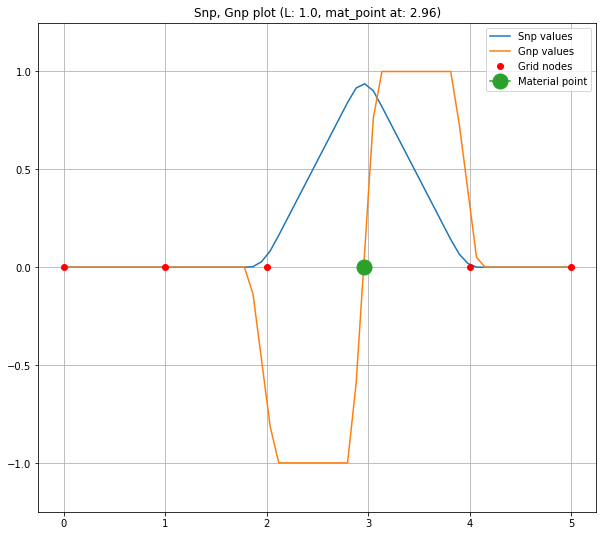

In [279]:
fig, ax = plt.subplots(figsize=(10, 9))

xp = 0
L = 1.0
particles_per_cell = 4
lp = 0.5 * L / particles_per_cell  

xn_arr = np.linspace(0, 5 * L, 6)
xn_arr_ticks = np.linspace(0, 5 * L, 60)

snp_arr = [snp(xp, xn, lp, L) for xn in xn_arr_ticks]
gnp_arr = [gnp(xp, xn, lp, L) for xn in xn_arr_ticks]
snp_plot, = ax.plot(xn_arr_ticks, snp_arr, label= 'Snp values')
gnp_plot, = ax.plot(xn_arr_ticks, gnp_arr, label= 'Gnp values')

ax.plot(xn_arr, [0] * xn_arr.size, 'o', label= 'Grid nodes', color= 'red')
matpoint_plot, = ax.plot([xp], [0], marker='o', markerSize=15, label='Material point')

ax.set_xticks(xn_arr)
ax.set_ylim(-1.25, 1.25)
ax.legend()
ax.grid(True)
ax.set_title('Snp, Gnp plot (L: %s, mat_point at: %s)'%(L, xp))

def animate(i):
    xp =  (1 + np.sin(np.pi/2 +  np.pi * i / 180.0)) * 0.5 * 3
    snp_arr = [snp(xp, xn, lp, L) for xn in xn_arr_ticks]
    gnp_arr = [gnp(xp, xn, lp, L) for xn in xn_arr_ticks]

    matpoint_plot.set_data([xp], [0])
    snp_plot.set_data(xn_arr_ticks, snp_arr)
    gnp_plot.set_data(xn_arr_ticks, gnp_arr)
    
    ax.set_title('Snp, Gnp plot (L: %s, mat_point at: %.2f)'%(L, xp))
   
    return (snp_plot,)

anim = animation.FuncAnimation(fig, animate, frames=375, interval=25, blit=True)
HTML(anim.to_html5_video())

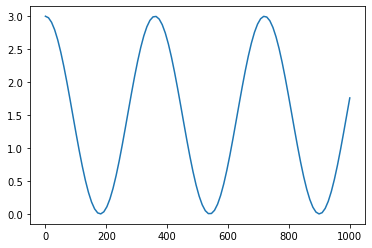

In [262]:
fig, ax = plt.subplots()
i = np.linspace(0, 1000, 100)

y =  0.5 * (3 + 3.0 * np.sin(np.pi * i / 180.0) )
y =    (1 + np.sin(np.pi/2 +  np.pi * i / 180.0)) * 0.5 * 3
ax.plot(i, y)
